# Houston Property Tax Data Exploration

We will be working on Harris County Appraisal District (HCAD) real estate property dataset. Based on this database there over 1 million real estate properties in Harric county. This dataset has many tables covering features such as property size, maket value, number of bedrooms, name of owners and etc.
Because of the size we will focus only on properties located in zip code 77079.
We will look at property features such as values, number of bedrooms, type of properties, ownership duration and etc.

HCAD data is used for actuall annual property tax calculations for all real estate properties in Houston, Texas. And because proeprty tax is the main revenue source for Houston city we can assume that it contains almost all real estate objects in Harris county.

The disadvantage of focusing only on one zip code is that we may not be able to transfer all conclusions to other real estate properties located in other zip codes. This is specially important as real estate inheritingly is not a standard product and is highly customized to its usage, owners interest, original developer, environmental situation and etc.



## Analytic Questions

### 1. What is building to land size ratio and does it vary with total value per square feet?
### 2. What is the ratio of single family homes to condominums for both 
### owner residents and absentee owners? Does it vary by size of building? 
### 3. Does last ownership duration correlate with last inspected duration?

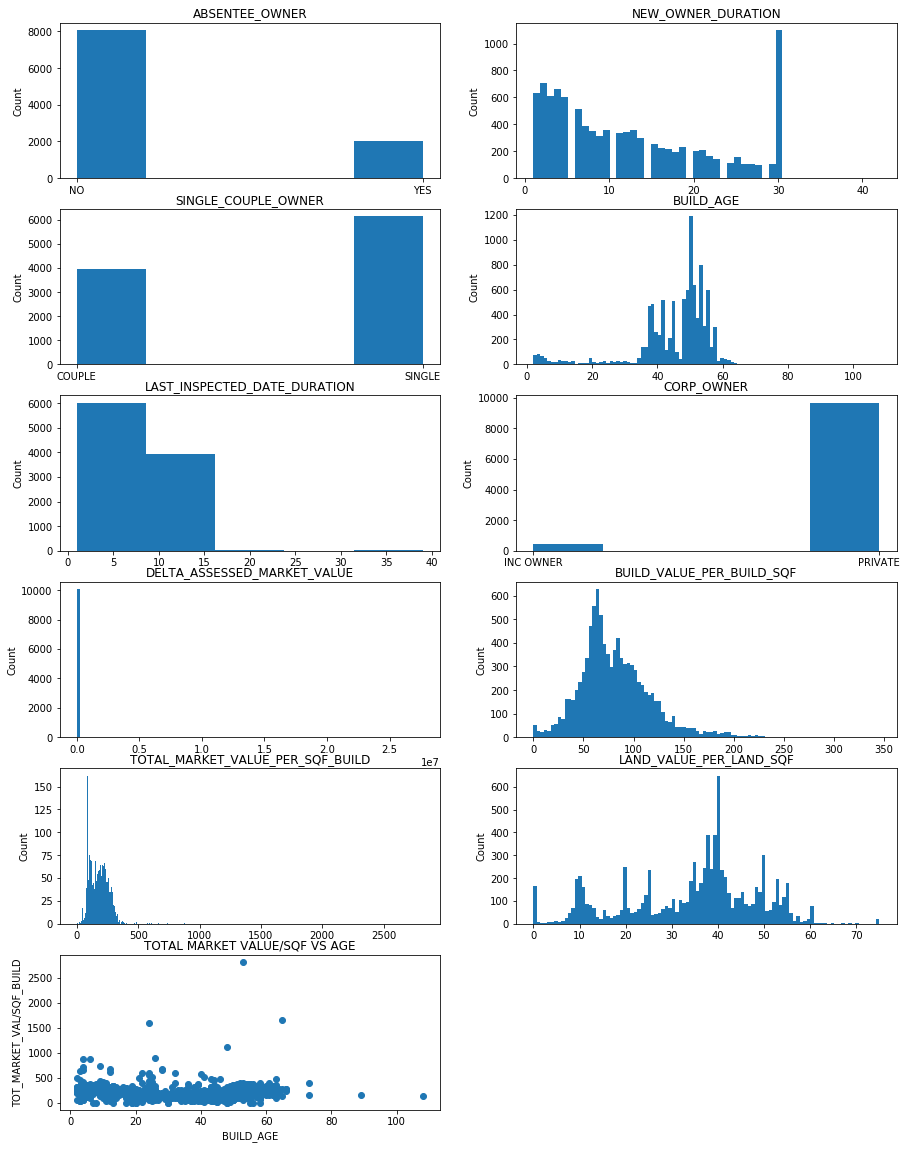

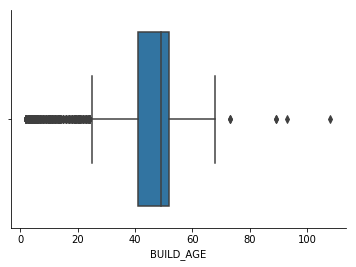

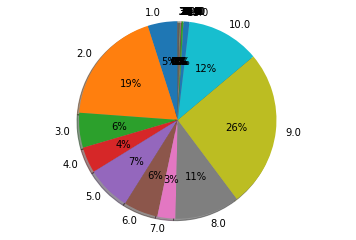

In [424]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig=plt.figure()

# Read data
df = pd.DataFrame()
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/Capstone/here/hcad.csv")

# 
#print (df.head(3))

#  subplot(No of plots per row, No. of plots per column, plot no#)
# Need to drop NA values for specific columns so histogram does not return error


fig = plt.figure(figsize=(15, 20))

ax = fig.add_subplot(6,2,1)
df1=df.dropna(subset=['ABSENTEE_OWNER']) 
ax.hist(df['ABSENTEE_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('ABSENTEE_OWNER')

ax = fig.add_subplot(6,2,2)
df1=df.dropna(subset=['NEW_OWNER_DURATION']) 
ax.hist(df['NEW_OWNER_DURATION'],bins = 50)
plt.ylabel('Count')
plt.title('NEW_OWNER_DURATION')

ax = fig.add_subplot(6,2,3)
df1=df.dropna(subset=['SINGLE_COUPLE_OWNER']) 
ax.hist(df['SINGLE_COUPLE_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('SINGLE_COUPLE_OWNER')

ax = fig.add_subplot(6,2,4)
df1=df.dropna(subset=['BUILD_AGE']) 
ax.hist(df1['BUILD_AGE'],bins = 100)
plt.ylabel('Count')
plt.title('BUILD_AGE')

ax = fig.add_subplot(6,2,5)
df1=df.dropna(subset=['LAST_INSPECTED_DATE_DURATION']) 
ax.hist(df1['LAST_INSPECTED_DATE_DURATION'],bins = 5)
plt.ylabel('Count')
plt.title('LAST_INSPECTED_DATE_DURATION')

ax = fig.add_subplot(6,2,6)
df1=df.dropna(subset=['CORP_OWNER']) 
ax.hist(df1['CORP_OWNER'],bins = 5)
plt.ylabel('Count')
plt.title('CORP_OWNER')

ax = fig.add_subplot(6,2,7)
df1=df.dropna(subset=['DELTA_ASSESSED_MARKET_VALUE']) 
ax.hist(df1['DELTA_ASSESSED_MARKET_VALUE'],bins = 100)
plt.ylabel('Count')
plt.title('DELTA_ASSESSED_MARKET_VALUE')

ax = fig.add_subplot(6,2,8)
df1=df.dropna(subset=['BUILD_VALUE_PER_BUILD_SQF']) 
ax.hist(df1['BUILD_VALUE_PER_BUILD_SQF'],bins = 100)
plt.ylabel('Count')
plt.title('BUILD_VALUE_PER_BUILD_SQF')

ax = fig.add_subplot(6,2,9)
df1=df.dropna(subset=['TOTAL_MARKET_VALUE_PER_SQF_BUILD']) 
ax.hist(df1['TOTAL_MARKET_VALUE_PER_SQF_BUILD'],bins = 2000)
plt.ylabel('Count')
plt.title('TOTAL_MARKET_VALUE_PER_SQF_BUILD')

ax = fig.add_subplot(6,2,10)
df1=df.dropna(subset=['LAND_VALUE_PER_LAND_SQF']) 
ax.hist(df1['LAND_VALUE_PER_LAND_SQF'],bins = 100)
plt.ylabel('Count')
plt.title('LAND_VALUE_PER_LAND_SQF')

# Scatter Building Age vs Total Market Value per SQF
ax = fig.add_subplot(6,2,11)
#df1=df.dropna(subset=['TOTAL_MARKET_VALUE_PER_SQF_BUILD']) 

ax.scatter(df['BUILD_AGE'], df['TOTAL_MARKET_VALUE_PER_SQF_BUILD'])
plt.title('TOTAL MARKET VALUE/SQF VS AGE')
plt.xlabel('BUILD_AGE')
plt.ylabel('TOT_MARKET_VAL/SQF_BUILD')
plt.show()
                              
# Boxplot  
sns.boxplot(df['BUILD_AGE']) 
sns.despine()

# Describe Absentee owner by building age
df1=df.dropna(subset=['BUILD_AGE', 'ABSENTEE_OWNER']) 
df2= df['BUILD_AGE'].groupby([ df['ABSENTEE_OWNER']])
df2.describe()

# Describe Absentee owner by building size
df1=df.dropna(subset=['TOTAL_BUILDING_AREA', 'STATE_CLASS']) 
df2= df['TOTAL_BUILDING_AREA'].groupby([ df['STATE_CLASS']])
df2.describe()

# Describe size of rental propeties by private individualsdf2=df.dropna(subset=['STATE_CLASS']) 
df2=df[(df.STATE_CLASS == 'A1')]
df3= df2['TOTAL_BUILDING_AREA'].groupby([df2['ABSENTEE_OWNER']])
df3.describe()

# Group frequency of inspection by property class type
df1 = df[['STATE_CLASS', 'LAST_INSPECTED_DATE', 'LAST_INSPECTED_DATE_DURATION']]
grouped = df1.groupby(['LAST_INSPECTED_DATE_DURATION'])
df2 = grouped.count()

# Make pie chart showing most frequent inspection]

sizes = df2[['LAST_INSPECTED_DATE']]
labels = list(df2.index)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
